<a href="https://colab.research.google.com/github/leelaakula/padhai-dl/blob/master/SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Sigmoid Function in one dimension

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook

In [0]:
def sigmoid(x,w,b):
  return 1/(1+np.exp(-w*x+b))

In [284]:
sigmoid(1,0.5,0)

0.6224593312018546

In [0]:
w=0.9
b=0.1
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)

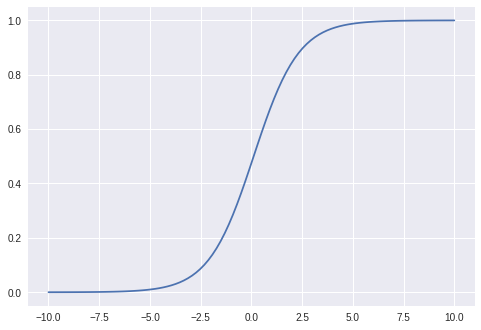

In [286]:
plt.plot(X,Y)
plt.show()

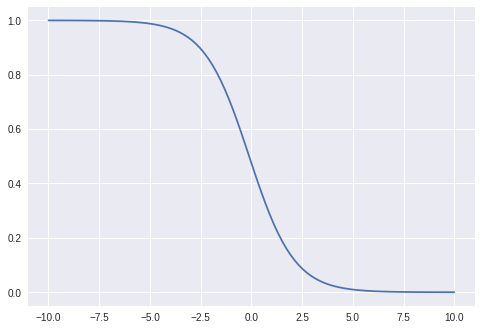

In [287]:
w=-0.9
b=0.1
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)
plt.plot(X,Y)
plt.show()

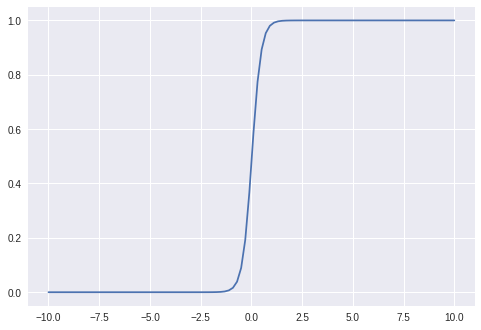

In [288]:
w=4.4 #@param {type: "slider", min: -10, max: 10, step:0.1}
b=0.1
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)
plt.plot(X,Y)
plt.show()

# Sigmoid ploting in multiple dimension

In [0]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(np.dot(x1,w1)+np.dot(x2,w2)+b)))

In [290]:
sigmoid_2d(1,0,0.5,0,0)

0.6224593312018546

In [0]:
from mpl_toolkits import mplot3d

In [0]:
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)

# to get all possible combinations between X1, X2
XX1, XX2 = np.meshgrid(X1, X2)


In [0]:
w1 = 0.5
w2= 0.5
b=0
Z = sigmoid_2d(XX1, XX2, w1,w2,b)

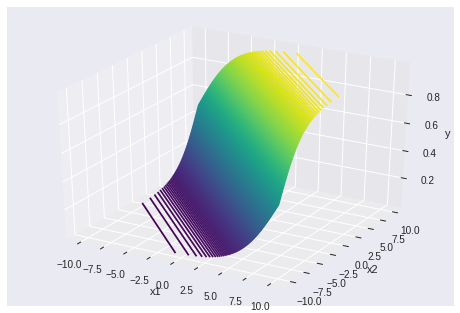

In [294]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(XX1,XX2,Z,200, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

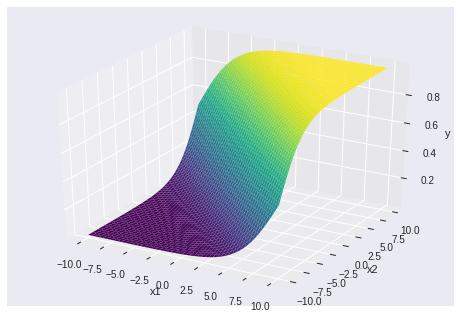

In [295]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1,XX2,Z, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

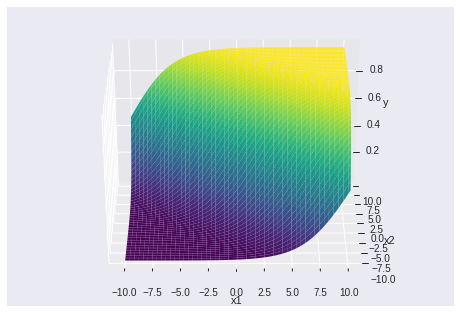

In [296]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1,XX2,Z, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');
ax.view_init(30,270)

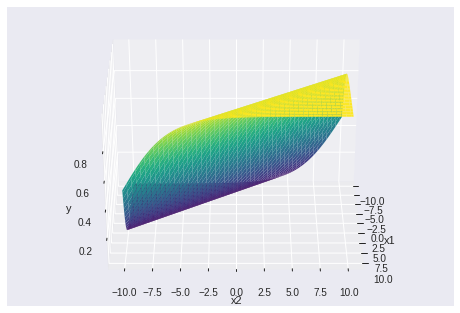

In [297]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1,XX2,Z, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');
ax.view_init(30,0)

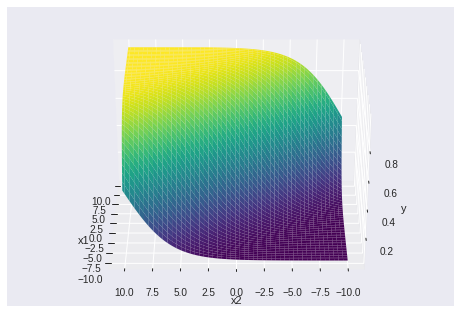

In [298]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1,XX2,Z, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');
ax.view_init(30,180)

# Compute Loss for  a given Dataset



In [0]:
w_unknown = 0.5
b_unknown = 0.25
X = np.random.random(25) * 20 -10
Y = sigmoid(X, w_unknown, b_unknown)

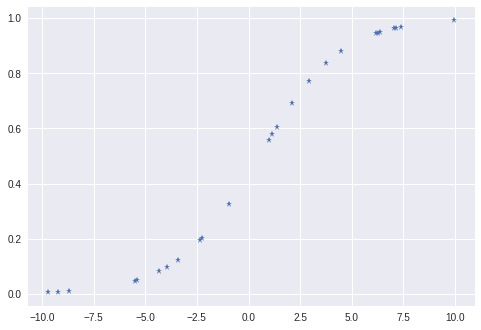

In [300]:
plt.plot(X,Y, '*')
plt.show()

In [0]:
def calculate_loss(X, Y, w_est, b_est):
  loss=0
  for x, y in zip(X,Y):
    loss+=(y-sigmoid(x, w_est, b_est))**2
  return loss

In [0]:
W = np.linspace(-1,1,100)
B = np.linspace(-1,1,100)

WW,BB = np.meshgrid(W,B)

Loss = np.zeros(WW.shape)

In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

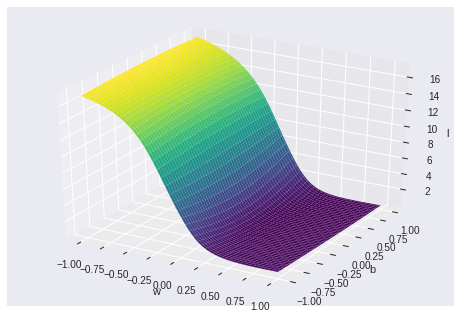

In [304]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW,BB,Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('l');
#ax.view_init(30,180)

In [0]:
W = np.linspace(0,2,100)
B = np.linspace(-1,1,100)

WW,BB = np.meshgrid(W,B)

Loss = np.zeros(WW.shape)

In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

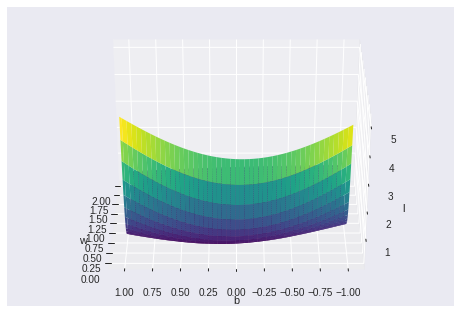

In [307]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW,BB,Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('l');
ax.view_init(30,180)

In [308]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * (Loss.shape[1])) # to get int values
print(i, j)

62 25


In [309]:
print(i*Loss.shape[1])

6200


In [310]:
Loss.shape[1]

100

In [311]:
print(WW[i,j], BB[i,j])

0.5050505050505051 0.2525252525252526


# Contour Plotting

In [0]:
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)

# to get all possible combinations between X1, X2
XX1, XX2 = np.meshgrid(X1, X2)

In [0]:
w1 = 0.5
w2= 0.5
b=0
Z = sigmoid_2d(XX1, XX2, w1,w2,b)

In [0]:
my_map = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

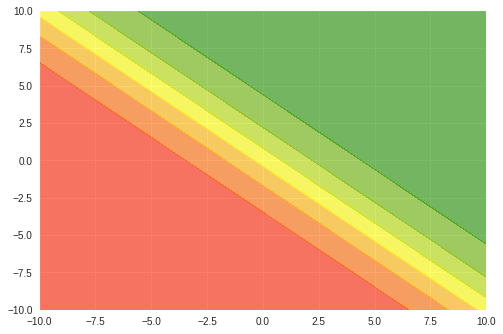

In [315]:
plt.contourf(XX1, XX2, Z, cmap = my_map, alpha = 0.6)
plt.show()

# Class of SigmoidNeuron

In [0]:
class SigmoidNeuron:
  def __init__(self):
    self.w = None
    self.b =None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self,x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs = 1, learning_rate = 1,initialise = True, display_loss = False):
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss={}
      
    for i in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)
        
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epoces')
      plt.ylabel('mean squared error')
      plt.show()
  
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)
      
      

# Fit for Toy Data

In [0]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [0]:
sn = SigmoidNeuron()

In [0]:
sn.fit(X, Y, 1, 0.25, True)

In [320]:
print(sn.w, sn.b)

[[1.59759035 0.65151159]] [0.02875912]


In [321]:
sn.fit(X, Y, 1, 0.5, True)
for i in range(20):
  print(sn.w, sn.b)
  sn.fit(X, Y, 1, 0.5, False)

[[-0.17756692  0.8282596 ]] [0.01498548]
[[0.27480333 0.62625722]] [0.03177397]
[[0.67569435 0.28321255]] [0.0424643]
[[ 0.76381859 -0.21450183]] [0.06393492]
[[ 0.84824121 -0.33154385]] [-0.00736623]
[[ 0.96908132 -0.27272695]] [-0.06671716]
[[ 1.0165753  -0.38501508]] [-0.12543852]
[[ 1.11149447 -0.32869971]] [-0.17332516]
[[ 1.14978211 -0.41036799]] [-0.22104118]
[[ 1.2188428  -0.38377763]] [-0.26064126]
[[ 1.25801723 -0.42607278]] [-0.29901806]
[[ 1.3072547  -0.42635783]] [-0.33261936]
[[ 1.34587151 -0.44564772]] [-0.36423681]
[[ 1.38444914 -0.45557107]] [-0.39311618]
[[ 1.41938676 -0.46757337]] [-0.42001375]
[[ 1.45232983 -0.47801844]] [-0.44502106]
[[ 1.48318845 -0.48799439]] [-0.46839016]
[[ 1.51226089 -0.49736144]] [-0.49029048]
[[ 1.53972417 -0.50621402]] [-0.51087685]
[[ 1.56574099 -0.51460052]] [-0.53028135]


In [0]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap = my_map, alpha = 0.6)
  ax.scatter(X[:,0], X[:,1], c = Y, cmap = my_map)
  ax.plot()

[[-0.13950474 -0.0317768 ]] [-0.02555766]
[[ 0.70573906 -0.23643895]] [-0.00960107]
[[ 0.8294946  -0.27460364]] [-0.06928019]
[[ 0.92554338 -0.30674117]] [-0.12416629]
[[ 1.00662317 -0.33154231]] [-0.17403723]
[[ 1.07600017 -0.35522058]] [-0.21942157]
[[ 1.13790665 -0.37423479]] [-0.26065092]
[[ 1.19282381 -0.39273712]] [-0.29833917]
[[ 1.24286898 -0.40850148]] [-0.33282955]
[[ 1.28834837 -0.42346015]] [-0.36457661]


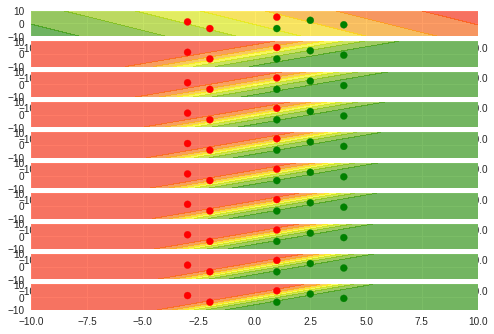

In [323]:
sn.fit(X, Y, 1, 0.5, True)
N = 10
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)

[[ 0.43376486 -0.52678376]] [0.03616357]
[[ 0.771016   -0.13583515]] [0.0316868]
[[ 0.81668245 -0.39986443]] [-0.03581844]
[[ 0.99056977 -0.20857665]] [-0.08741503]
[[ 1.00329058 -0.43869487]] [-0.14813176]
[[ 1.13332761 -0.29320031]] [-0.19251905]
[[ 1.15070843 -0.43954939]] [-0.24194256]
[[ 1.23446018 -0.37204148]] [-0.27910777]
[[ 1.26529148 -0.43638682]] [-0.31713455]
[[ 1.31749174 -0.42595906]] [-0.34904942]


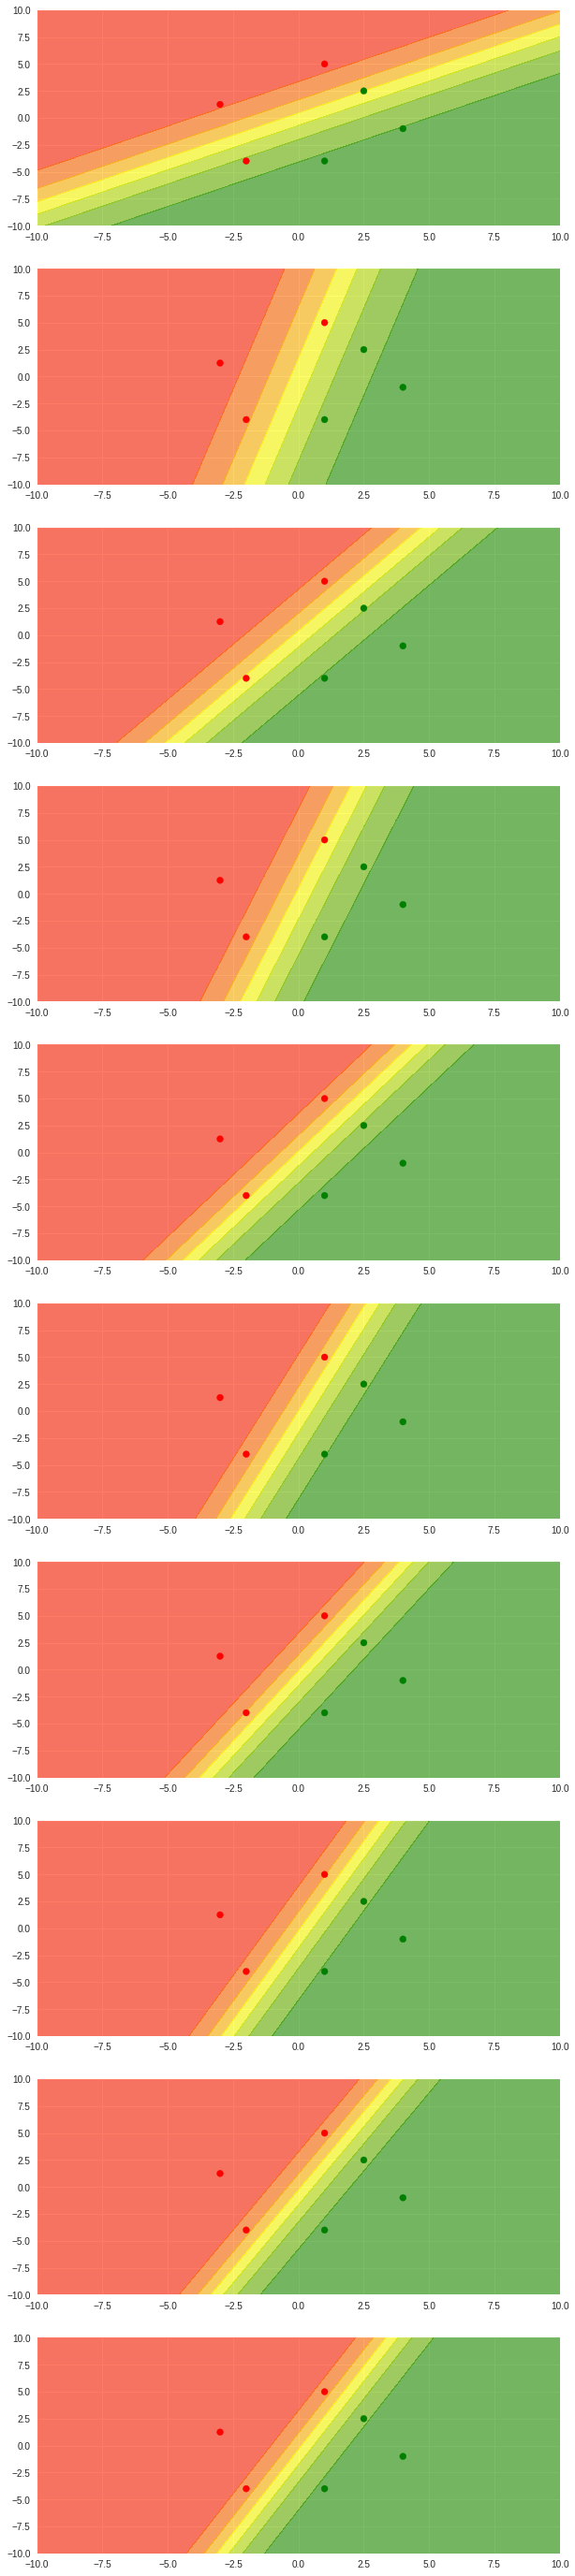

In [324]:
sn.fit(X, Y, 1, 0.5, True)
N = 10
plt.figure(figsize=(10, N * 5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)

[[-1.55797597  1.38822803]] [-0.00721368]
[[-1.27546943  1.65573544]] [0.09323477]
[[-1.17184804  1.74315752]] [0.12937309]
[[-1.11282204  1.78355156]] [0.14710624]
[[-1.06746637  1.80796219]] [0.15873053]
[[-1.02825089  1.82386471]] [0.16723809]
[[-0.99200676  1.83425079]] [0.17384976]
[[-0.95698153  1.84058857]] [0.17919179]
[[-0.9219854   1.84366602]] [0.18363429]
[[-0.88604777  1.84390446]] [0.1874212]


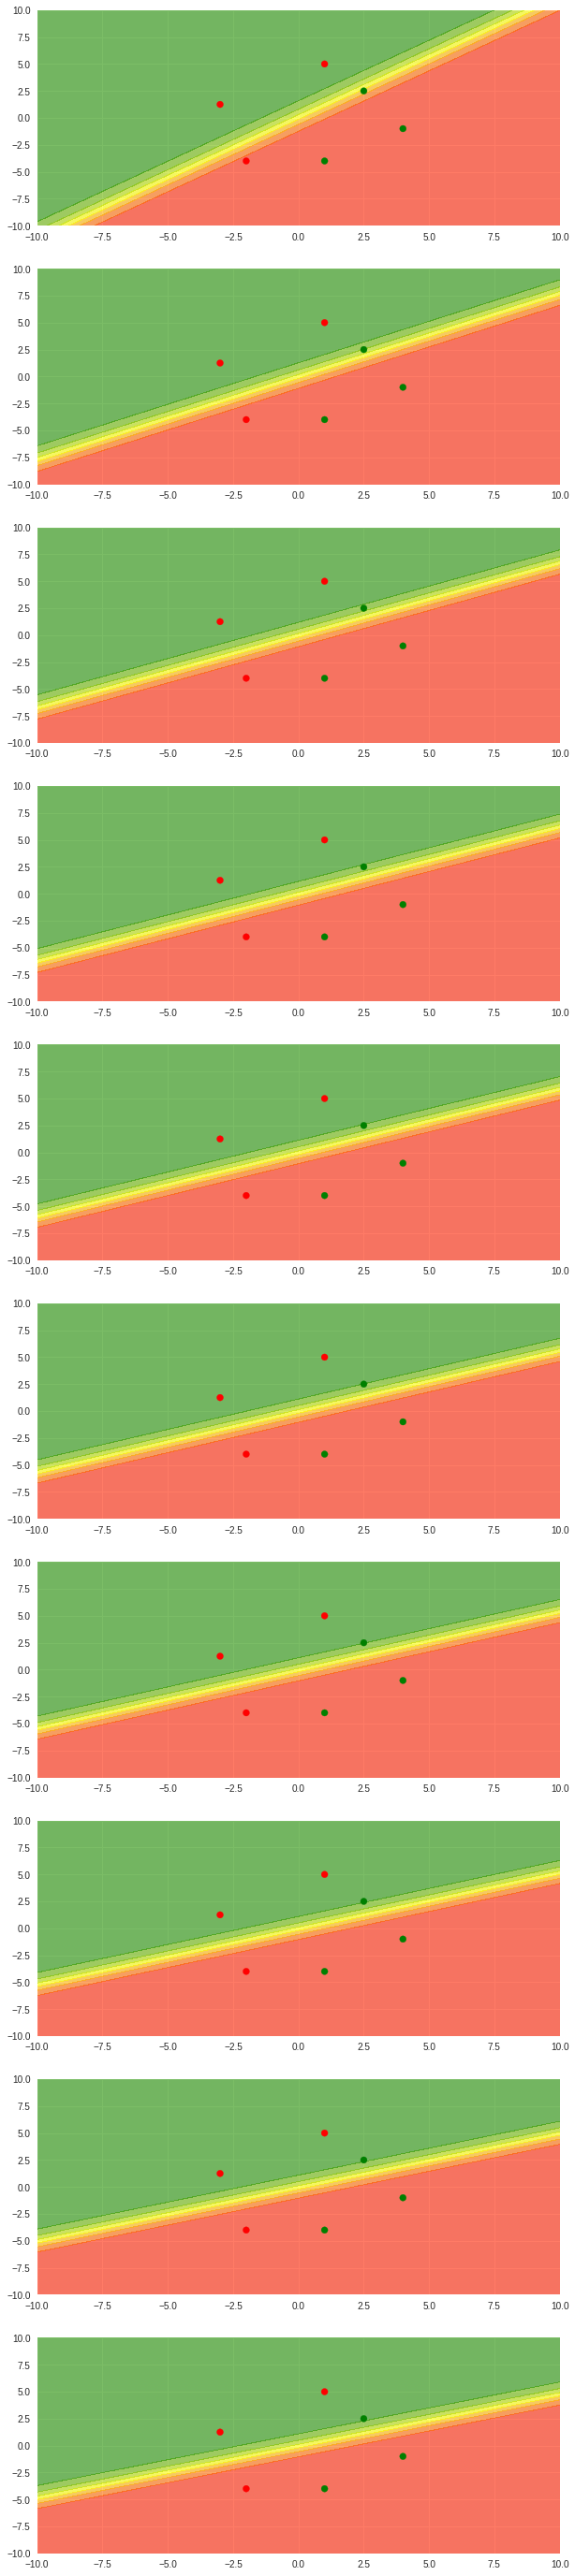

In [325]:
sn.fit(X, Y, 1, 0.75, True)
N = 10
plt.figure(figsize=(10, N * 5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.75, False)

# Loadind Data

In [326]:
!wget https://www.dropbox.com/s/739uo8ebwbic9kb/mobile_cleaned.csv

--2019-03-04 17:46:40--  https://www.dropbox.com/s/739uo8ebwbic9kb/mobile_cleaned.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/739uo8ebwbic9kb/mobile_cleaned.csv [following]
--2019-03-04 17:46:41--  https://www.dropbox.com/s/raw/739uo8ebwbic9kb/mobile_cleaned.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc58f3d5d72f118e1af1d20c6c6a.dl.dropboxusercontent.com/cd/0/inline/AcdScs0ilBJb7SuOuMWxLsSqLvf6RrLkyIWdoDl-ZFpPh1LbnuPi81lkiBOLoOVwDeAml-fePHEz-np5f4KuV3dxTFhRtprLte1AK0ynWndFt_Q2zHrEW94m8u5uaRsCxEY/file# [following]
--2019-03-04 17:46:42--  https://uc58f3d5d72f118e1af1d20c6c6a.dl.dropboxusercontent.com/cd/0/inline/AcdScs0ilBJb7SuOuMWxLsSqLvf6RrLkyIWdoDl-ZFpPh1LbnuPi81lkiBOLoOVwDeAml-fePHEz-np5f4KuV3dxTFhRtp

In [327]:
!ls

mobile_cleaned.csv  mobile_cleaned.csv.1  mobile_cleaned.csv.2	sample_data


In [0]:
data = pd.read_csv("mobile_cleaned.csv")

In [329]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [330]:
data.shape

(341, 88)

In [0]:
X = data.drop('Rating', axis = 1)

In [0]:
Y = data['Rating']

In [0]:
# we are converting the df to array to process 
Y= data['Rating'].values

In [334]:
print(Y)

[4.5 4.5 4.4 4.3 4.4 4.5 4.3 4.1 4.3 4.5 4.5 4.  4.4 4.4 4.4 4.4 4.5 4.4
 4.4 4.4 4.4 4.5 4.4 4.3 4.2 4.3 4.3 4.6 4.4 4.5 3.9 4.2 4.3 4.2 4.3 4.3
 4.2 4.4 4.1 3.8 4.4 4.6 4.3 4.5 4.5 4.2 3.9 4.3 4.  4.3 4.3 3.9 4.2 4.5
 4.  4.6 4.2 2.8 4.4 4.3 4.2 4.4 4.4 4.  4.4 4.4 4.1 4.5 4.3 3.9 4.3 4.1
 4.1 4.2 3.4 4.2 4.6 3.8 4.3 4.5 4.2 4.5 4.5 4.  4.1 4.4 4.5 4.1 4.5 4.3
 4.5 3.9 3.9 4.4 4.4 4.4 4.  4.1 4.1 4.4 4.3 4.3 4.2 4.3 3.4 4.3 4.3 4.2
 4.6 4.8 4.4 3.4 3.7 4.2 4.3 4.4 4.3 4.2 4.1 4.3 4.  3.9 4.4 4.4 3.9 3.1
 3.7 4.2 4.4 4.  4.  4.1 4.2 4.3 4.2 4.3 4.1 3.6 4.1 4.  3.8 3.7 4.3 4.1
 4.1 4.5 4.  4.3 3.6 4.1 4.5 3.5 4.  4.3 4.6 3.5 3.9 4.1 3.9 3.8 4.4 4.3
 4.  3.9 4.4 4.7 3.9 4.5 3.7 4.  4.3 4.1 4.8 4.1 4.  4.7 4.  4.1 4.  3.4
 4.1 3.9 3.1 4.1 3.7 3.4 3.9 4.3 4.1 3.7 3.8 4.  3.8 4.6 3.4 3.3 3.2 3.5
 4.3 4.1 4.  3.8 4.3 4.1 4.  3.8 3.8 3.9 4.1 3.7 4.2 4.  4.2 4.4 4.1 3.4
 4.2 4.4 3.9 3.9 4.4 4.2 4.5 4.5 4.2 4.  4.2 3.5 3.7 4.3 5.  3.5 4.4 3.7
 4.3 3.9 4.3 3.8 3.8 4.3 5.  4.1 3.  4.4 3.  4.  4.

In [0]:
threshold = 4
data['Class'] = data['Rating']>= threshold

In [336]:
data['Class'].value_counts()

True     238
False    103
Name: Class, dtype: int64

In [0]:
# To convert the boolean to ints
threshold = 4.2
data['Class'] = (data['Rating']>= threshold).astype(np.int)

In [338]:
data['Class'].value_counts()

0    182
1    159
Name: Class, dtype: int64

In [339]:
data['Class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [340]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating,Class
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,1,0,0,0,1,4.5,1
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,1,0,0,0,1,4.5,1
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,1,0,0,0,1,4.4,1
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,1,0,0,0,0,1,4.3,1
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,1,0,0,0,1,4.4,1


In [341]:
print(Y)

[4.5 4.5 4.4 4.3 4.4 4.5 4.3 4.1 4.3 4.5 4.5 4.  4.4 4.4 4.4 4.4 4.5 4.4
 4.4 4.4 4.4 4.5 4.4 4.3 4.2 4.3 4.3 4.6 4.4 4.5 3.9 4.2 4.3 4.2 4.3 4.3
 4.2 4.4 4.1 3.8 4.4 4.6 4.3 4.5 4.5 4.2 3.9 4.3 4.  4.3 4.3 3.9 4.2 4.5
 4.  4.6 4.2 2.8 4.4 4.3 4.2 4.4 4.4 4.  4.4 4.4 4.1 4.5 4.3 3.9 4.3 4.1
 4.1 4.2 3.4 4.2 4.6 3.8 4.3 4.5 4.2 4.5 4.5 4.  4.1 4.4 4.5 4.1 4.5 4.3
 4.5 3.9 3.9 4.4 4.4 4.4 4.  4.1 4.1 4.4 4.3 4.3 4.2 4.3 3.4 4.3 4.3 4.2
 4.6 4.8 4.4 3.4 3.7 4.2 4.3 4.4 4.3 4.2 4.1 4.3 4.  3.9 4.4 4.4 3.9 3.1
 3.7 4.2 4.4 4.  4.  4.1 4.2 4.3 4.2 4.3 4.1 3.6 4.1 4.  3.8 3.7 4.3 4.1
 4.1 4.5 4.  4.3 3.6 4.1 4.5 3.5 4.  4.3 4.6 3.5 3.9 4.1 3.9 3.8 4.4 4.3
 4.  3.9 4.4 4.7 3.9 4.5 3.7 4.  4.3 4.1 4.8 4.1 4.  4.7 4.  4.1 4.  3.4
 4.1 3.9 3.1 4.1 3.7 3.4 3.9 4.3 4.1 3.7 3.8 4.  3.8 4.6 3.4 3.3 3.2 3.5
 4.3 4.1 4.  3.8 4.3 4.1 4.  3.8 3.8 3.9 4.1 3.7 4.2 4.  4.2 4.4 4.1 3.4
 4.2 4.4 3.9 3.9 4.4 4.2 4.5 4.5 4.2 4.  4.2 3.5 3.7 4.3 5.  3.5 4.4 3.7
 4.3 3.9 4.3 3.8 3.8 4.3 5.  4.1 3.  4.4 3.  4.  4.

In [0]:
Y_binarised = data['Class'].values

In [343]:
print(Y_binarised)

[1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1
 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1
 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1
 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1
 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 1]


## Standardisation

In [0]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, mean_squared_error

In [0]:
R = np.random.random([100,1])

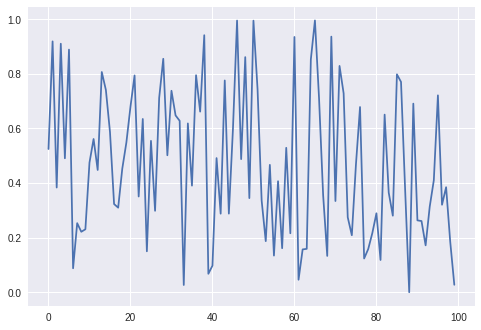

In [346]:
plt.plot(R, '-')
plt.show()

In [347]:
np.mean(R)

0.4733321653017778

In [348]:
np.std(R)

0.27199776950608034

In [0]:
scaler = StandardScaler()

In [350]:
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [351]:
scaler.mean_

array([0.47333217])

In [352]:
scaler.scale_

array([0.27199777])

In [0]:
RT = scaler.transform(R)

In [354]:
# we transform because to fit the data in the graph by taking mean as x = 0 axis and defined the standard deviation 
np.mean(RT)

-3.6637359812630164e-16

In [355]:
np.std(RT)

1.0

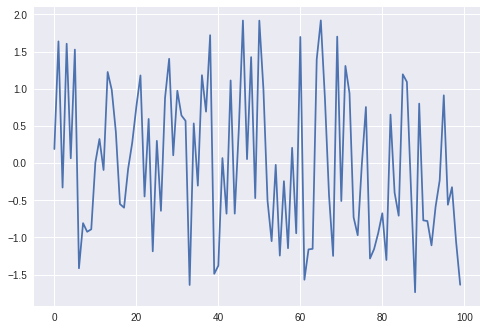

In [356]:
plt.plot(RT)
plt.show()

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, stratify = Y_binarised)

In [358]:
print(X_train.shape, X_test.shape)

(255, 87) (86, 87)


In [0]:
scaler = StandardScaler()

In [360]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [361]:
print(Y_train)

[4.2 4.3 4.3 4.  4.5 4.1 4.2 4.3 4.1 4.4 4.3 3.  4.5 4.3 4.8 4.4 4.  4.4
 4.6 4.2 4.5 4.3 3.3 4.3 3.4 4.4 4.3 4.1 4.3 4.4 4.  4.5 3.1 3.5 4.2 3.6
 4.1 3.8 4.2 4.  4.  3.9 4.1 3.9 4.3 3.7 4.2 4.1 4.3 4.1 4.3 4.4 4.2 3.8
 4.  4.2 4.4 4.3 4.4 3.8 3.9 4.4 3.9 3.9 4.2 3.9 4.5 3.9 3.4 4.5 4.4 4.
 4.5 4.1 4.4 4.5 3.9 4.3 4.4 4.3 4.4 3.9 4.  4.1 4.  4.2 3.9 4.  3.  4.3
 4.3 4.7 3.4 3.3 3.5 4.1 3.8 4.2 5.  4.  4.3 4.2 4.1 4.1 4.2 4.2 3.8 4.4
 4.  3.7 4.1 4.  4.2 3.7 4.5 4.  4.1 3.5 4.3 4.  4.5 3.9 4.2 3.8 4.3 3.
 3.4 4.3 3.4 3.9 4.3 4.1 4.1 3.9 4.4 4.  4.4 4.2 3.7 3.8 4.1 4.4 4.2 3.8
 4.5 4.7 3.9 4.2 4.3 4.  3.5 3.9 4.4 4.1 4.3 2.8 4.5 4.1 4.2 3.7 3.9 4.
 3.8 4.4 4.  2.5 4.  4.2 3.7 4.1 4.1 4.  4.3 4.3 4.4 4.1 4.  4.  4.4 4.4
 3.9 3.7 4.4 3.7 4.6 4.  4.3 3.8 4.5 4.3 4.3 3.9 4.1 3.7 4.2 3.7 4.  4.3
 3.6 3.8 3.6 3.8 4.3 3.7 4.  4.3 4.1 4.3 4.5 3.9 4.1 3.9 4.1 4.4 3.8 4.3
 4.2 4.5 3.9 4.5 4.1 3.4 3.9 4.2 4.1 4.2 4.2 4.4 3.6 4.5 4.  3.4 4.  4.1
 3.9 4.5 3.8 4.6 3.5 4.6 4.4 3.7 4.4 4.  4.4 4.4 4.4 3

In [0]:
minmax_scaler = MinMaxScaler()

In [363]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train)

ValueError: ignored

In [0]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1, 1))

In [365]:
np.max(Y_scaled_train)

1.0

In [0]:
Y_scaled_test = minmax_scaler.fit_transform(Y_test.reshape(-1, 1))

In [367]:
np.max(Y_scaled_test)

0.9999999999999998

In [368]:
print(Y_scaled_test)

[[0.59090909]
 [0.72727273]
 [0.72727273]
 [0.31818182]
 [0.72727273]
 [0.63636364]
 [0.72727273]
 [0.63636364]
 [0.13636364]
 [0.72727273]
 [0.72727273]
 [0.68181818]
 [0.68181818]
 [0.81818182]
 [0.59090909]
 [0.68181818]
 [0.63636364]
 [0.72727273]
 [0.27272727]
 [0.36363636]
 [0.59090909]
 [0.27272727]
 [0.59090909]
 [0.31818182]
 [0.5       ]
 [0.59090909]
 [0.59090909]
 [0.68181818]
 [0.27272727]
 [0.54545455]
 [0.54545455]
 [0.54545455]
 [0.59090909]
 [0.77272727]
 [0.18181818]
 [0.81818182]
 [0.5       ]
 [0.09090909]
 [0.68181818]
 [0.5       ]
 [0.77272727]
 [0.40909091]
 [0.72727273]
 [0.59090909]
 [0.        ]
 [0.68181818]
 [0.63636364]
 [0.27272727]
 [0.59090909]
 [0.77272727]
 [0.54545455]
 [0.22727273]
 [0.68181818]
 [0.31818182]
 [0.59090909]
 [0.81818182]
 [1.        ]
 [0.54545455]
 [0.72727273]
 [0.77272727]
 [0.22727273]
 [0.36363636]
 [0.59090909]
 [0.77272727]
 [0.81818182]
 [0.77272727]
 [0.90909091]
 [0.63636364]
 [0.68181818]
 [0.36363636]
 [0.68181818]
 [0.5 

In [369]:
scaled_threshold = minmax_scaler.transform(threshold)

ValueError: ignored

In [0]:
# we are converting the scaler threshold to an array and then we are reshaping it
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(1, -1)))[0][0]

In [371]:
scaled_threshold

0.6363636363636365

In [372]:
threshold

4.2

In [0]:
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype(np.int)

In [374]:
Y_binarised_train

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
    

In [0]:
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype(np.int).ravel()

In [376]:
Y_binarised_train

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [0]:
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype("int").ravel()

In [378]:
Y_binarised_test

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

# Train on Real Data

In [0]:
sn = SigmoidNeuron()

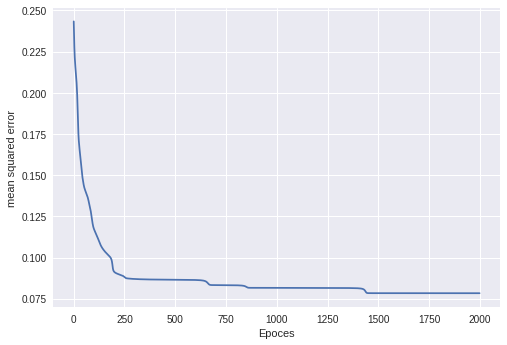

In [413]:
sn.fit(X_scaled_train, Y_scaled_train, epochs = 2000, learning_rate = 0.015, display_loss = True)

In [0]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [0]:
Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype("int").ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype("int").ravel()

In [0]:
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_binarised_train)
accuracy_test = accuracy_score(Y_pred_binarised_test, Y_binarised_test)

In [409]:
print(accuracy_test, accuracy_train)

0.8255813953488372 0.792156862745098
